# **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.8 MB/s eta 0:00:00


# **Import all necessary Libraries**

In [2]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Download Dataset From Roboflow**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NdtJjcJiaqyh6kXqq34s")
project = rf.workspace("projects-is2ka").project("traffic-light-detection-hznds")
version = project.version(1)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...


# **Custom Training**

In [2]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/Traffic-Light-Detection-1/data.yaml epochs=100 imgsz=640 plots=True

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Traffic-Light-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

# **View Training Results**

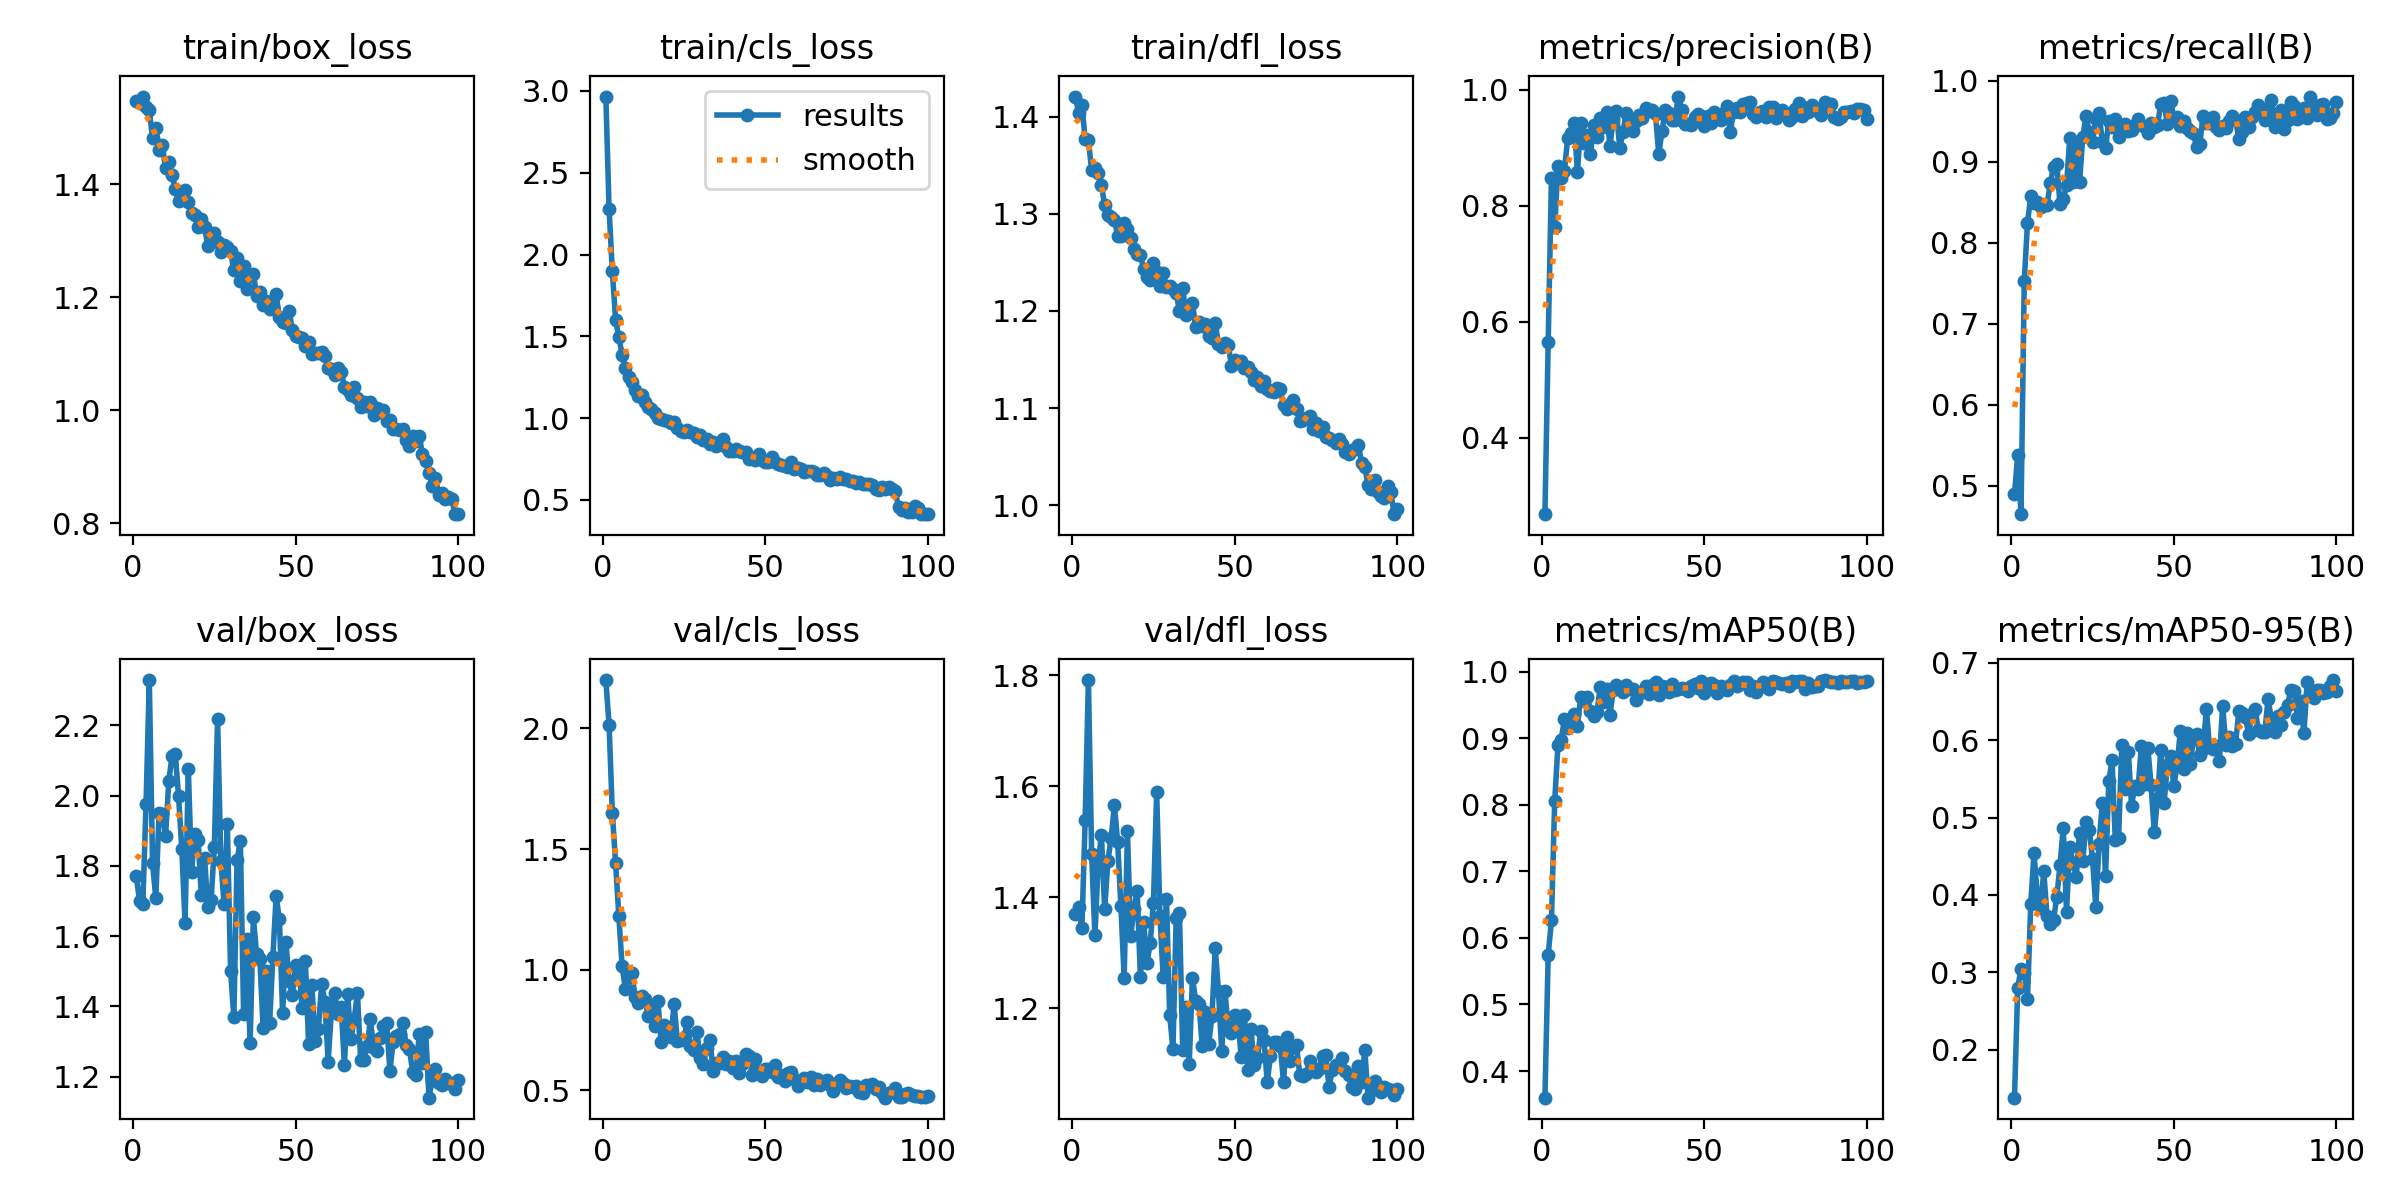

In [4]:
from IPython.display import Image
display(Image(filename='/content/runs/detect/train/results.png', width=600))

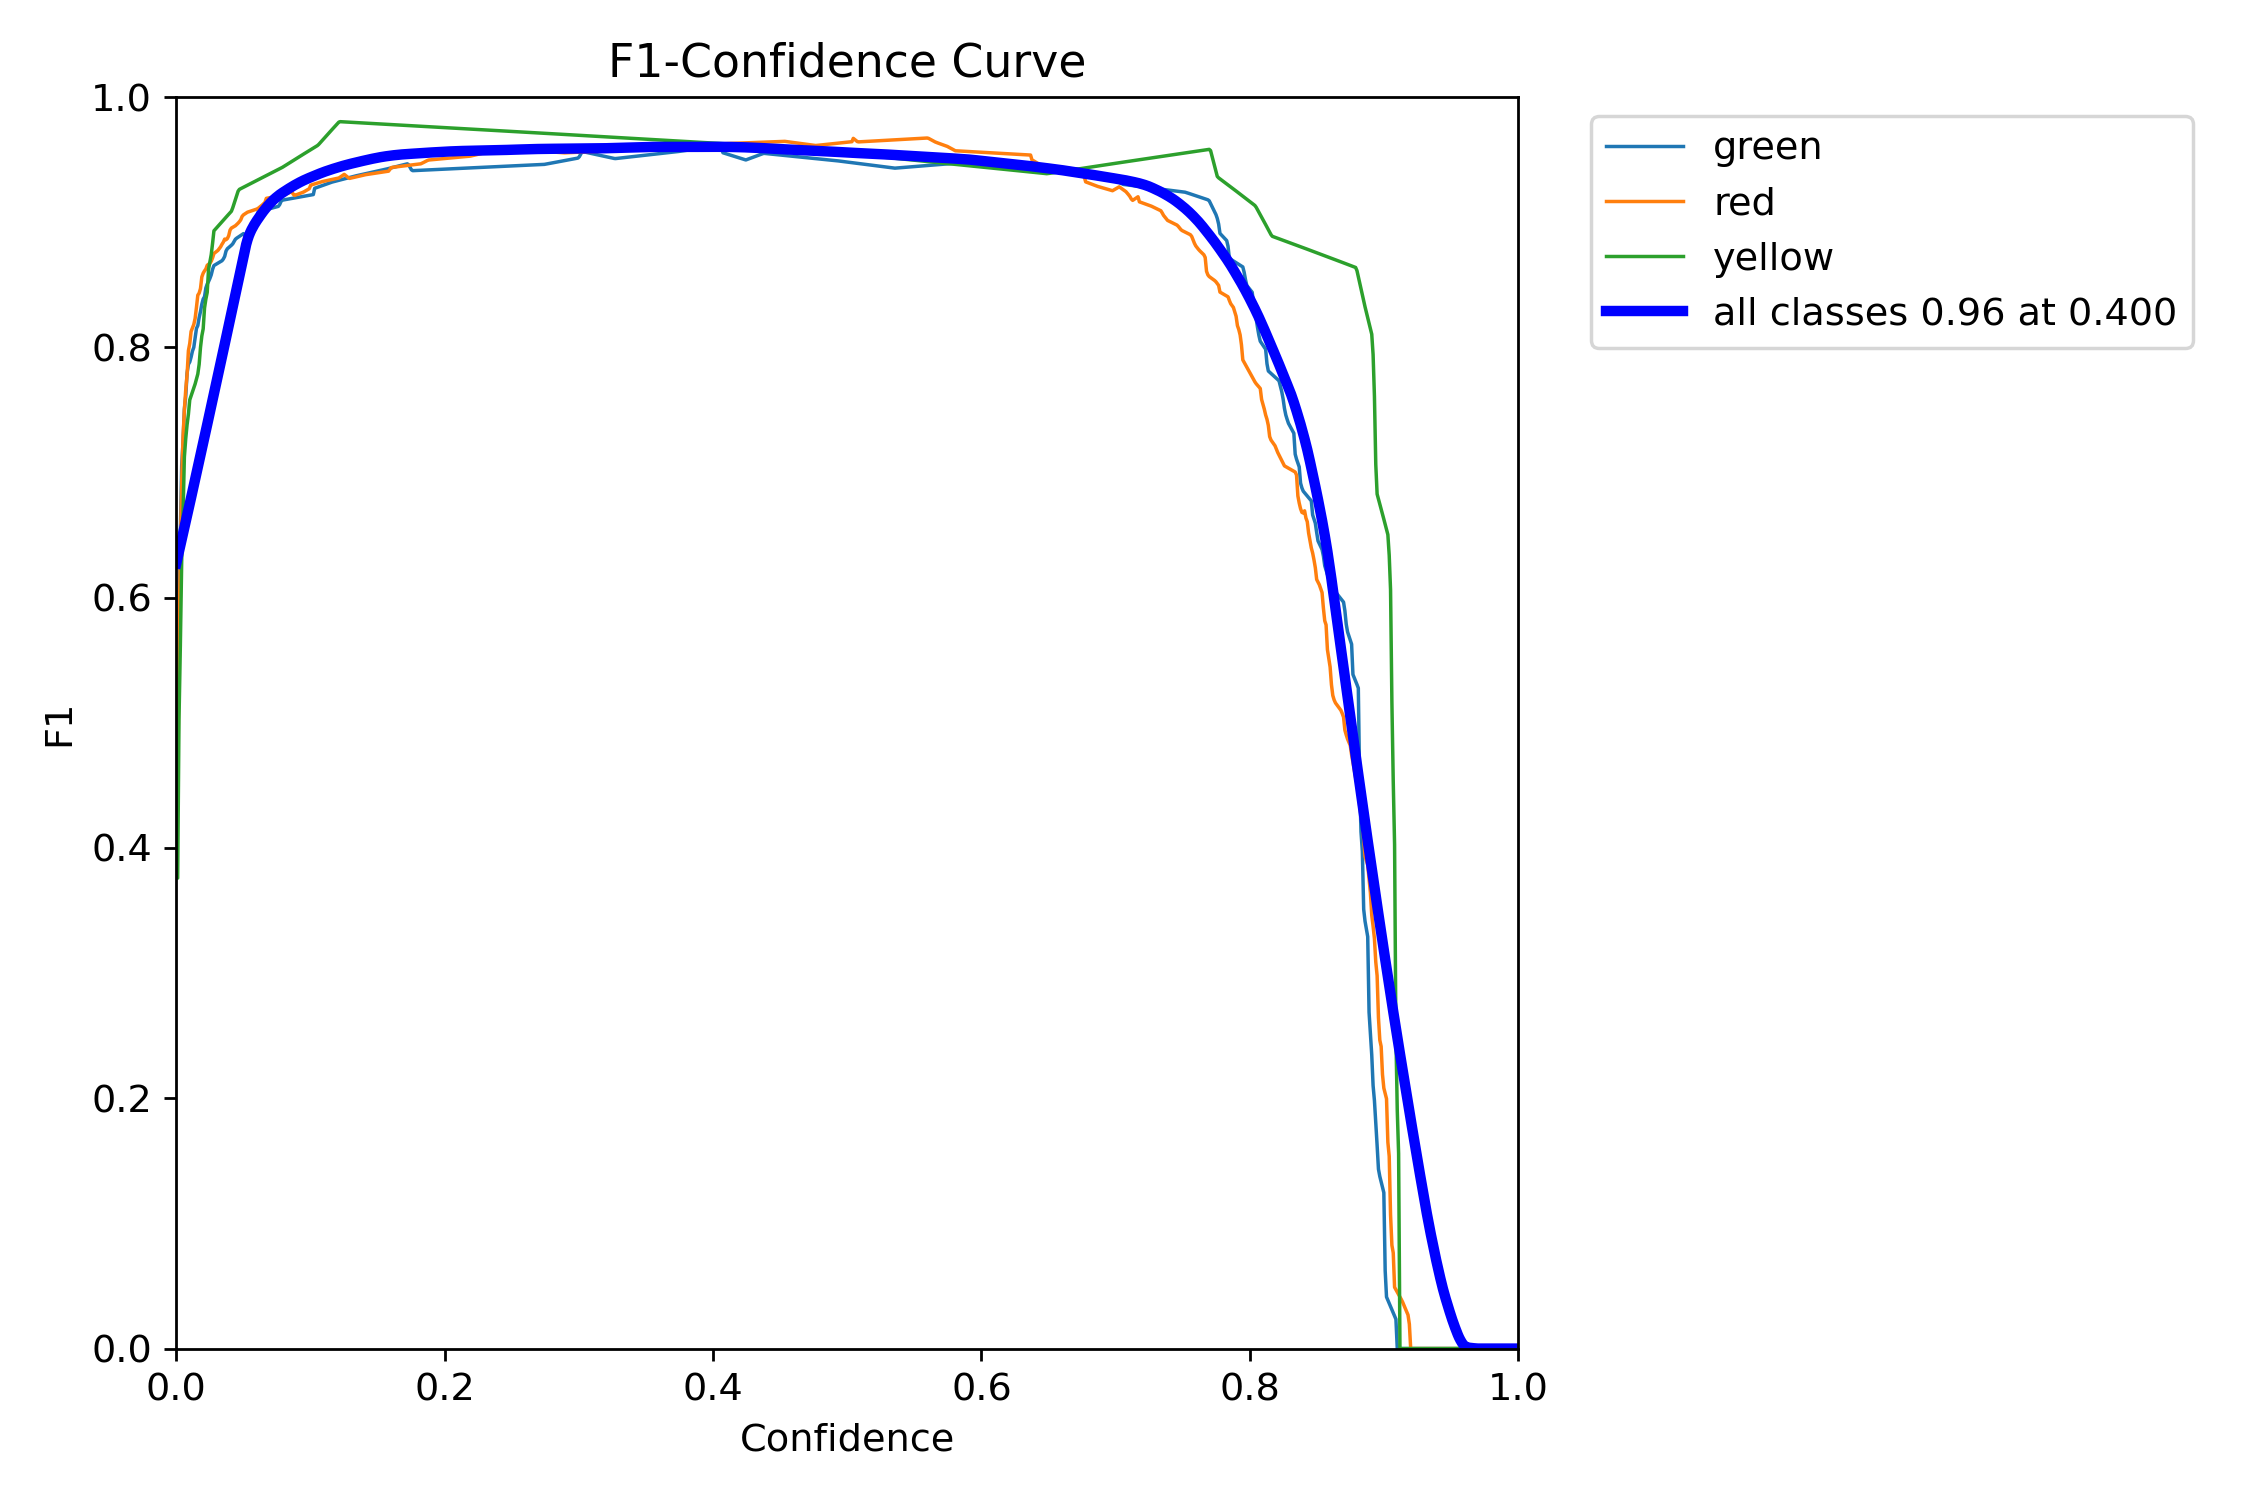

In [7]:
display(Image(filename='/content/runs/detect/train/BoxF1_curve.png', width=600))

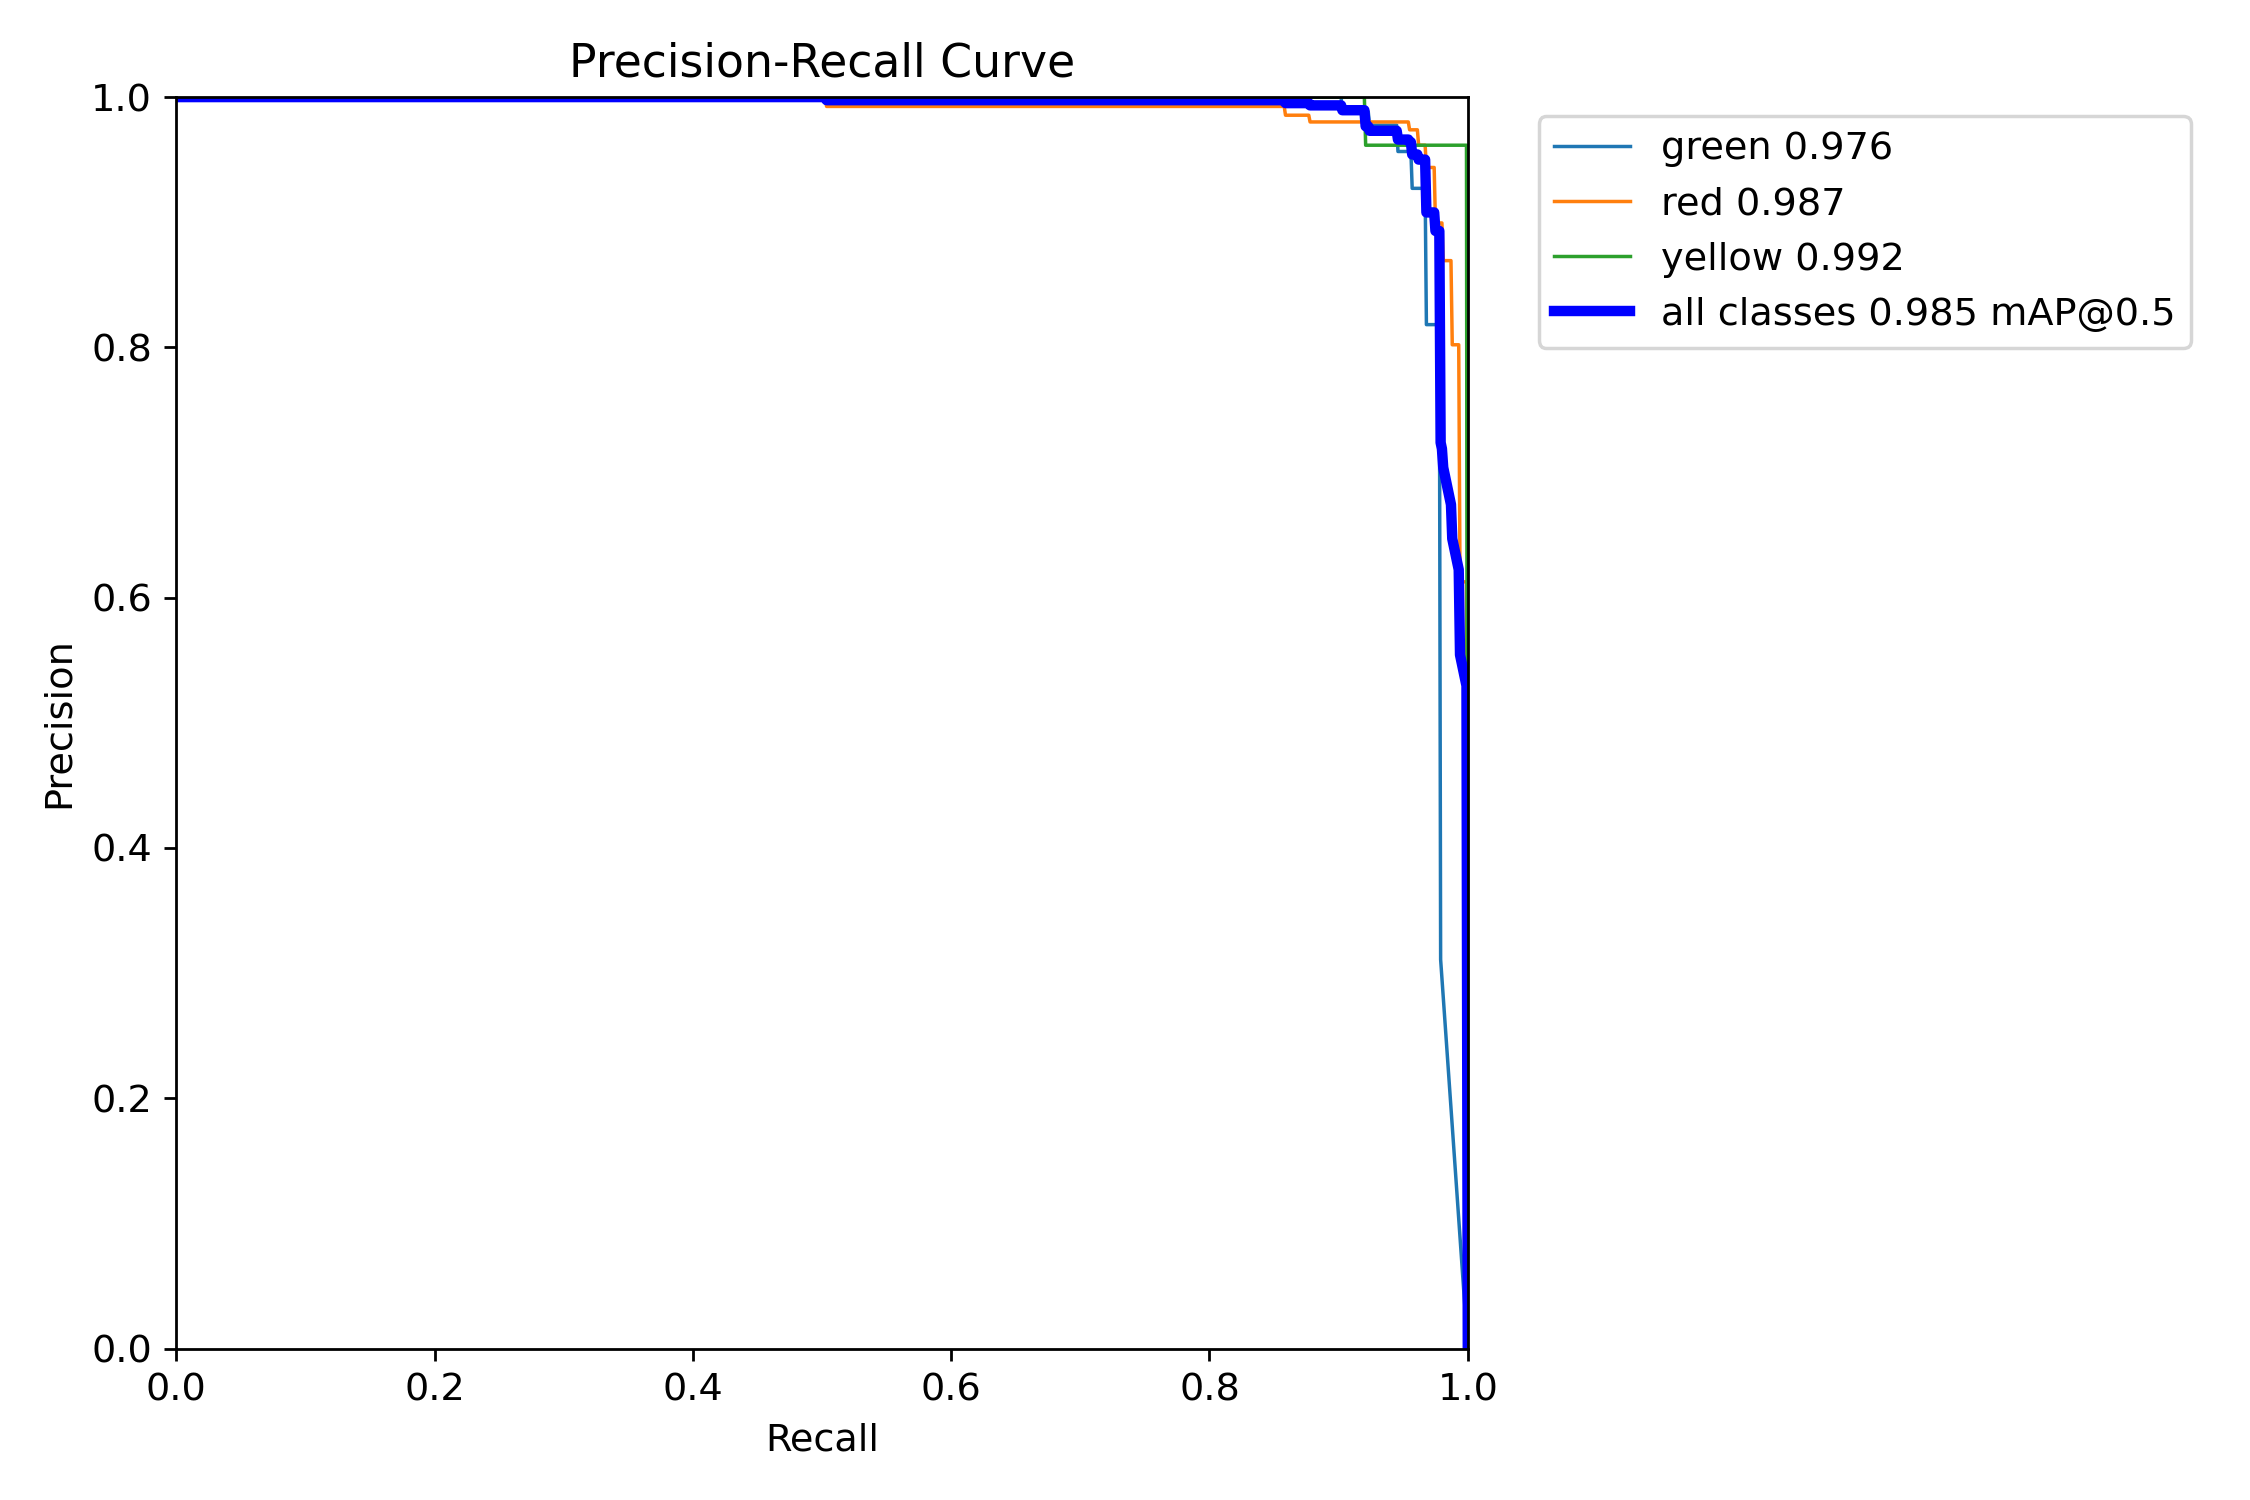

In [8]:
display(Image(filename='/content/runs/detect/train/BoxPR_curve.png', width=600))

### **Validate fine-tuned model**

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Traffic-Light-Detection-1/data.yaml

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1445.5±619.1 MB/s, size: 40.3 KB)
val: Scanning /content/Traffic-Light-Detection-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 27.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 4.5it/s 2.9s
                   all        200        272      0.965       0.96      0.985      0.678
                 green         69         92      0.976      0.946      0.976      0.659
                   red        111        155      0.957      0.968      0.987      0.658
                yellow         24         25       0.96      0.966      0.992      0.718
Speed: 2.7ms preprocess, 4.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/runs/detec

# **Inference with custom model**

In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/Traffic-Light-Detection-1/test/images save=True

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/67 /content/Traffic-Light-Detection-1/test/images/traffic-light-323-_jpg.rf.c4c600e998839b07ffa5a66ee05f29db.jpg: 640x640 1 green, 2 reds, 11.2ms
image 2/67 /content/Traffic-Light-Detection-1/test/images/traffic-light-325-_jpg.rf.524291bb41c4da2b54a24a66afcebd79.jpg: 640x640 2 greens, 8.2ms
image 3/67 /content/Traffic-Light-Detection-1/test/images/traffic-light-330-_jpg.rf.9a28646e5f002c63fbdcc19898ce1593.jpg: 640x640 2 reds, 7.8ms
image 4/67 /content/Traffic-Light-Detection-1/test/images/traffic-light-336-_jpg.rf.a624b31e2e1757321308dc080a32816e.jpg: 640x640 (no detections), 7.5ms
image 5/67 /content/Traffic-Light-Detection-1/test/images/traffic-light-392-_jpg.rf.e90a3915bd1b8cea8698201aca97e3a2.jpg: 640x640 1 green, 7.6ms
image 6/67 /content/Traffic-Light-Detection-1/test/images/traffic-light-42-_jpg.rf.704ed3c28

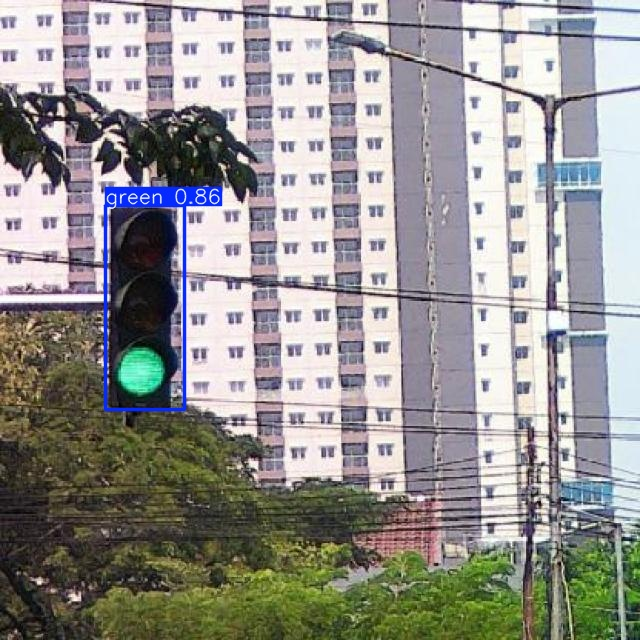

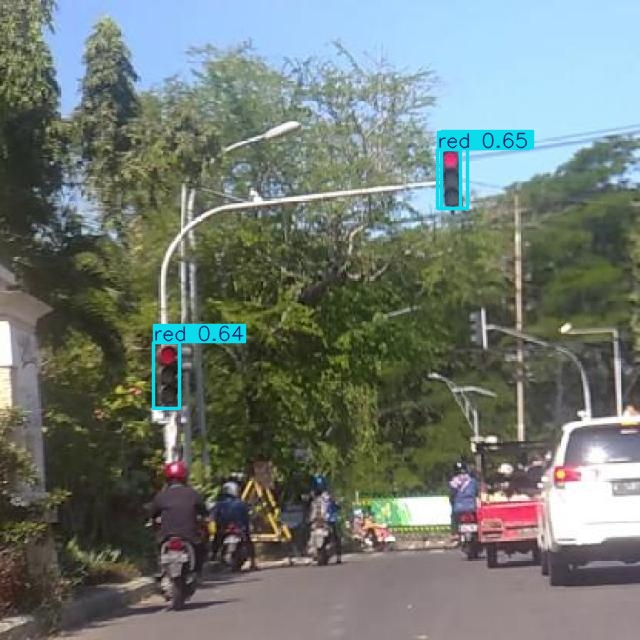

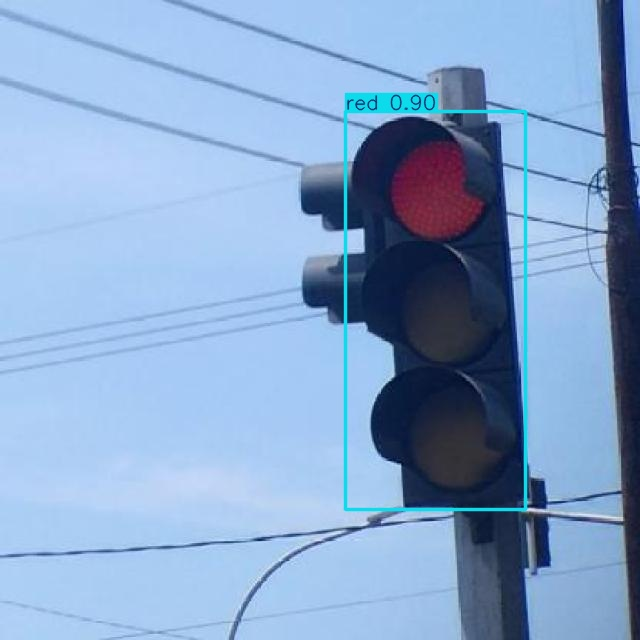

In [11]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")